In [1]:
from pyspainmobility import Mobility, Zones
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


/Users/mluca/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# getting 1 week of mobility data. In this case, we download the data from March 10 to March 16 
mobility_data = Mobility(version=2, zones='lua', start_date='2024-10-14', end_date='2024-10-20')
# and we extract the OD matrices 
mobility_data.get_od_data()

In [2]:
df = pd.read_parquet('Viajes_GAU_2024-10-14_2024-10-20_v2.parquet')
df = df[(df['id_destination']=='GAU Madrid')&(df['id_origin']=='GAU Barcelona')]
df = df.groupby(['date','hour'])['n_trips'].sum().reset_index()

/Users/mluca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mluca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


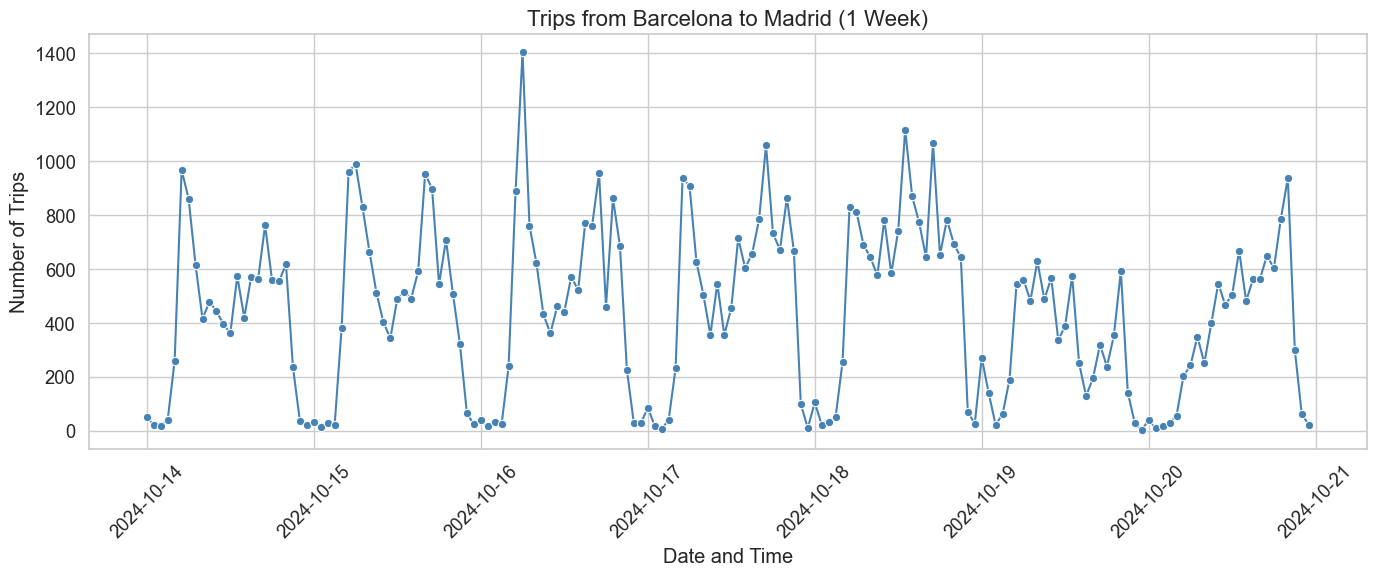

In [3]:
# Convert date to datetime and create a unified datetime index
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

# Sort values by time to ensure chronological order
df = df.sort_values(by='datetime')

# Set the plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot the time series
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='datetime', y='n_trips', marker='o', color='steelblue')

# Customize the plot
plt.title('Trips from Barcelona to Madrid (1 Week)', fontsize=16)
plt.xlabel('Date and Time')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()